ЛАБОРАТОРНАЯ РАБОТА 9. ИСПОЛЬЗОВАНИЕ РАЗРАБОТАННОГО ПАЙПЛАЙНА ДЛЯ МНОГОМЕРНОЙ РЕГРЕССИИ

Цели и задачи

Цель лабораторной работы: научиться применять разработанный пайплайн для тиражирования кода с целью решения широкого круга задач машинного обучения.
Основные задачи:
–	получение навыков рефакторинга кода в проектах машинного обучения;
–	получение навыков определения ключевых признаков в задачах машинного обучения;
–	получение навыков реализации ключевых стратегий оптимизации моделей регрессии.

Теоретическое обоснование
При решении задач многомерной регресси исследователю необходимо решить ряд подзадач:
1.	Определить коррелированность признаков.
2.	Определить, какие признаки существенны при построении модели регрессии.
Проблема определения значимых признаков мвязана с проблемой снижения размерности.
Важное значение при многомерной регресси приобретает обработка категориальных признаов. Часто необходимо заменить категориальный признак на набор фиктивных переменных.
К проблеме выбора значимых переменных существует несколько стратегий (фактически это методы построения модели многомерной регрессии):
1.	All-in. В данном подходе производится включение веех признаков в модель.
2.	Backward Elimination. В подходе предполагается обучение модели с учетом всех признаков и удаление признаков по одному на основе их значимости до достижения ситуации, когда останутся только значимые признаки.
3.	Forward Selection. Подход предполагает начальное тестирование модели с одним признаком (тестируется каждый признак). Затем добавляются по одному наиболее значимые признаки.
4.	Bidirectional Elimination. Подход совмещает стратегии 2 и 3.
5.	Score Comparison.

Оборудование и материалы

Для выполнения лабораторной работы рекомендуется использовать персональный компьютер со следующими программными средствами разработки (выбрать один или несколько програмных продуктов для практической реализации задач лабораторной работы): MS Visual Studio 2013 и выше; среда разработки Java, интерпретатор Python (Jupyter Notebook).

Методика и порядок выполнения работы

Перед выполнением индивидуального задания рекомендуется выполнить все пункты учебной задачи.

Постановка задачи.
Задание. На основе разработанного пайплайна для линейной одномерной регрессии разработать многомерную модель регрессии.
Решение. Для разработки модели необходимо реализовать следующий код:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
Зависимая переменная
[192261.83 191792.06 191050.39 182901.99 166187.94]


In [ ]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean", axis = 0)
# imputer = imputer.fit(X(:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])
# print(X)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# Labelencoder_y = LabelEncoder()
# print("Зависимая переменная до обработки")
# print(y)
# y = Labelencoder_y.fit_transform(y)
# print("Зависимая переменная после обработки")
# print(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
print("Перекодировка категориального признака")
print(X[:4,:])

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

1.5 Для предотвращения мультиколлинеарности необходимо избавиться от одной из
фиктивных переменных, добавленных в результате обработки категориальных признаков

In [ ]:
X = X[:, 1:]
print(X[:4,:])

  (0, 46)	1.0
  (0, 47)	1.0
  (0, 48)	165349.2
  (0, 49)	136897.8
  (0, 50)	2.0
  (1, 45)	1.0
  (1, 47)	1.0
  (1, 48)	162597.7
  (1, 49)	151377.59
  (2, 44)	1.0
  (2, 47)	1.0
  (2, 48)	153441.51
  (2, 49)	101145.55
  (2, 50)	1.0
  (3, 43)	1.0
  (3, 47)	1.0
  (3, 48)	144372.41
  (3, 49)	118671.85
  (3, 50)	2.0


1.6 Разделение выборки на тестовую и тренировочную

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

1.7 Обучение линейной модели регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

1.8 Обработка результатов, тюнинг модели
1.8.1 Предсказание

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[106089.73770857 130424.38265073 134561.34506938  70695.70372686
 178218.7080079  112183.12223787  66143.68960505 103554.33452411
 111113.87260284 168270.33210981]


На данный момент произведено обучение модели на всем наборе признаков. Для оптимизации модели реализуем стратегию Back Elimination (рисунк 9.2).

In [ ]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

In [ ]:
X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [ ]:
X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [ ]:
X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

IndexError: index 5 is out of bounds for axis 1 with size 5

In [ ]:
X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

Выполните индивидуальное задание.

Индивидуальное задание
1.	Подберите набор данных на ресурсах [5-7] и согласуйте свой выбор с преподавателем. Студент может предложить набор данных в соответствии с тематикой магистерского исследования.
2.	Постройте модель многомерной регрессии с использованием стратегии backward elimination.

Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:
1.	Номер и название лабораторной работы; задачи лабораторной работы.
2.	Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.
3.	Ответы на контрольные вопросы.

4.	Экранные формы (консольный вывод) и листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.
Отчет о выполнении лабораторной работы сдается преподавателю.

Контрольные вопросы

1.	Почему при реализации многомерной линейной регрессии необходимо добавить фиктивный признак с единственным значением 1.0?.
2.	то такое фиктивная переменная? Поясните причину удаления одной фиктивной переменной, возникающей при перекодировке категориального признака.
3.	На основе какого критерия можно выбирать удаляемый признак в алгоритме back elimination.
4.	В чем заключается алгоритм all-in regression?
5.	В чем заключается алгоритм forward selection regression?
6.	В чем заключается алгоритм Bidirectional Elimination?
7.	Стратегия Backward Elimination предполагает удаление признаков на основе анализа p-критерия. Как реализовать удаление признаков в автоматическом режиме?

Список литературы

Для выполнения лабораторной работы, при подготовке к защите, а также для ответа на контрольные вопросы рекомендуется использовать следующие
источники: [1, 2, 5-7].



1) Подключение библиотек и загрузка датасета

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('1.benign.csv')

2) Определение матрицы признаков и целевой переменной

In [ ]:
X = dataset.iloc[:, :-1].values  # Все столбцы, кроме последнего
y = dataset.iloc[:, -1].values    # Последний столбец как целевая переменная

3) Разделение данных на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

4) Добавление константного столбца для OLS

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

5) Построение модели OLS


In [ ]:
regressor_OLS = sm.OLS(endog=y_train, exog=X_train).fit()

6) Применение метода backward elimination

In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    num_vars = X.shape[1]
    selected_indices = np.arange(num_vars)  # Сохраним индексы оставшихся признаков
    for i in range(num_vars):
        regressor_OLS = sm.OLS(endog=y, exog=X[:, selected_indices]).fit()
        max_var = max(regressor_OLS.pvalues).astype(float)
        if max_var > significance_level:
            for j in range(len(selected_indices)):
                if (regressor_OLS.pvalues[j] == max_var):
                    selected_indices = np.delete(selected_indices, j)
                    break
    return selected_indices

selected_indices = backward_elimination(X_train, y_train)
X_opt = X_train[:, selected_indices]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()

Предсказание на тестовой выборке и вывод предсказанных значений

In [7]:
X_test_opt = X_test[:, selected_indices]  # Используем индексы оставшихся признаков
y_pred = regressor_OLS.predict(X_test_opt)

# Вывод предсказаний
print("Предсказанные значения:")
print(y_pred)


Предсказанные значения:
[-0.0002858   0.00167258 -0.00107696 ...  0.00134745  0.00223736
  0.00430054]


Оценка качества модели и визуализация предсказанных и истинных значений

Предсказанные значения:
[0.         0.00167258 0.         ... 0.00134745 0.00223736 0.00430054]
Средняя абсолютная ошибка (MAE): 0.002107475480462941
Среднеквадратичная ошибка (MSE): 0.00014759424872834315
Коэффициент детерминации (R²): 0.7494685366498568


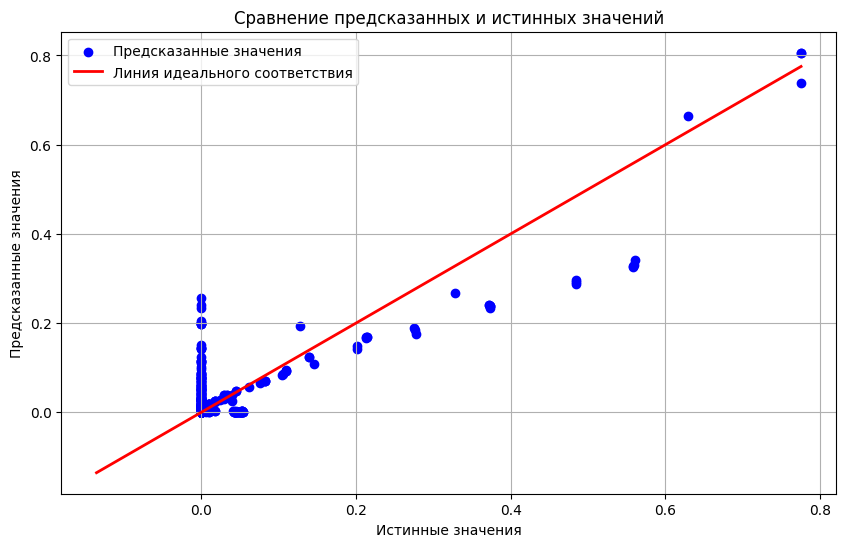

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Избегаем отрицательных предсказаний
y_pred = np.maximum(y_pred, 0)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Предсказанные значения:")
print(y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R²): {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Линия идеального соответствия')
plt.title('Сравнение предсказанных и истинных значений')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid()
plt.show()
